In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1.Anàlisi Exploratòria de Dades

In [2]:
file_path = './data/student_depression_dataset.csv'
mental_healt_df = pd.read_csv(file_path)
mental_healt_df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [3]:
mental_healt_df.shape

(27901, 18)

#### 1.1. Anàlisi de valors nuls

In [4]:
print(mental_healt_df.isna().sum())
print(mental_healt_df.shape)

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64
(27901, 18)


#### 1.2. Anàlisi de les columnes categòriques

In [19]:
categorical_vars = ['Gender', 'City', 'Profession', 'Degree', 'Dietary Habits', 'Academic Pressure', 'Study Satisfaction', 'Sleep Duration', 'Work Pressure', 'Job Satisfaction', 'Financial Stress']
numerical_vars = ['Age', 'CGPA', 'Work/Study Hours']
binary_vars = ['Have you ever had suicidal thoughts ?', 'Family History of Mental Illness' , 'Depression' ]

In [6]:
mental_healt_df[binary_vars].value_counts()

Have you ever had suicidal thoughts ?  Family History of Mental Illness  Depression
Yes                                    Yes                               1             7067
                                       No                                1             6890
No                                     No                                0             4290
                                       Yes                               0             3576
Yes                                    No                                0             2045
                                       Yes                               0             1654
No                                     Yes                               1             1206
                                       No                                1             1173
Name: count, dtype: int64

In [7]:
for column in categorical_vars:
    print(f'======================= {column} =======================')
    print(mental_healt_df[column].value_counts())

======================= Gender =======================
Gender
Male      15547
Female    12354
Name: count, dtype: int64
======================= City =======================
City
Kalyan                  1570
Srinagar                1372
Hyderabad               1340
Vasai-Virar             1290
Lucknow                 1155
Thane                   1139
Ludhiana                1111
Agra                    1094
Surat                   1078
Kolkata                 1066
Jaipur                  1036
Patna                   1007
Visakhapatnam            969
Pune                     968
Ahmedabad                951
Bhopal                   934
Chennai                  885
Meerut                   825
Rajkot                   816
Delhi                    768
Bangalore                767
Ghaziabad                745
Mumbai                   699
Vadodara                 694
Varanasi                 685
Nagpur                   651
Indore                   643
Kanpur                   609
Nashik    

In [8]:
for column in binary_vars:
    print(f'======================= {column} =======================')
    print(mental_healt_df[column].value_counts())

======================= Have you ever had suicidal thoughts ? =======================
Have you ever had suicidal thoughts ?
Yes    17656
No     10245
Name: count, dtype: int64
======================= Family History of Mental Illness =======================
Family History of Mental Illness
No     14398
Yes    13503
Name: count, dtype: int64
======================= Depression =======================
Depression
1    16336
0    11565
Name: count, dtype: int64


In [9]:
mental_healt_df[numerical_vars].describe()

,Age,CGPA,Work/Study Hours
count,27901.000000,27901.000000,27901.000000
mean,25.822300,7.656104,7.156984
std,4.905687,1.470707,3.707642
min,18.000000,0.000000,0.000000
25%,21.000000,6.290000,4.000000
50%,25.000000,7.770000,8.000000
75%,30.000000,8.920000,10.000000
max,59.000000,10.000000,12.000000


<Axes: >

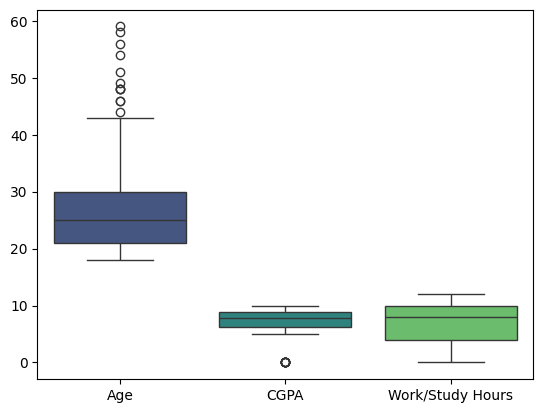

In [10]:
sns.boxplot(mental_healt_df[numerical_vars], orient='v', palette='viridis')

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2
3 0
3 1
3 2
4 0
4 1
4 2
5 0
5 1
5 2


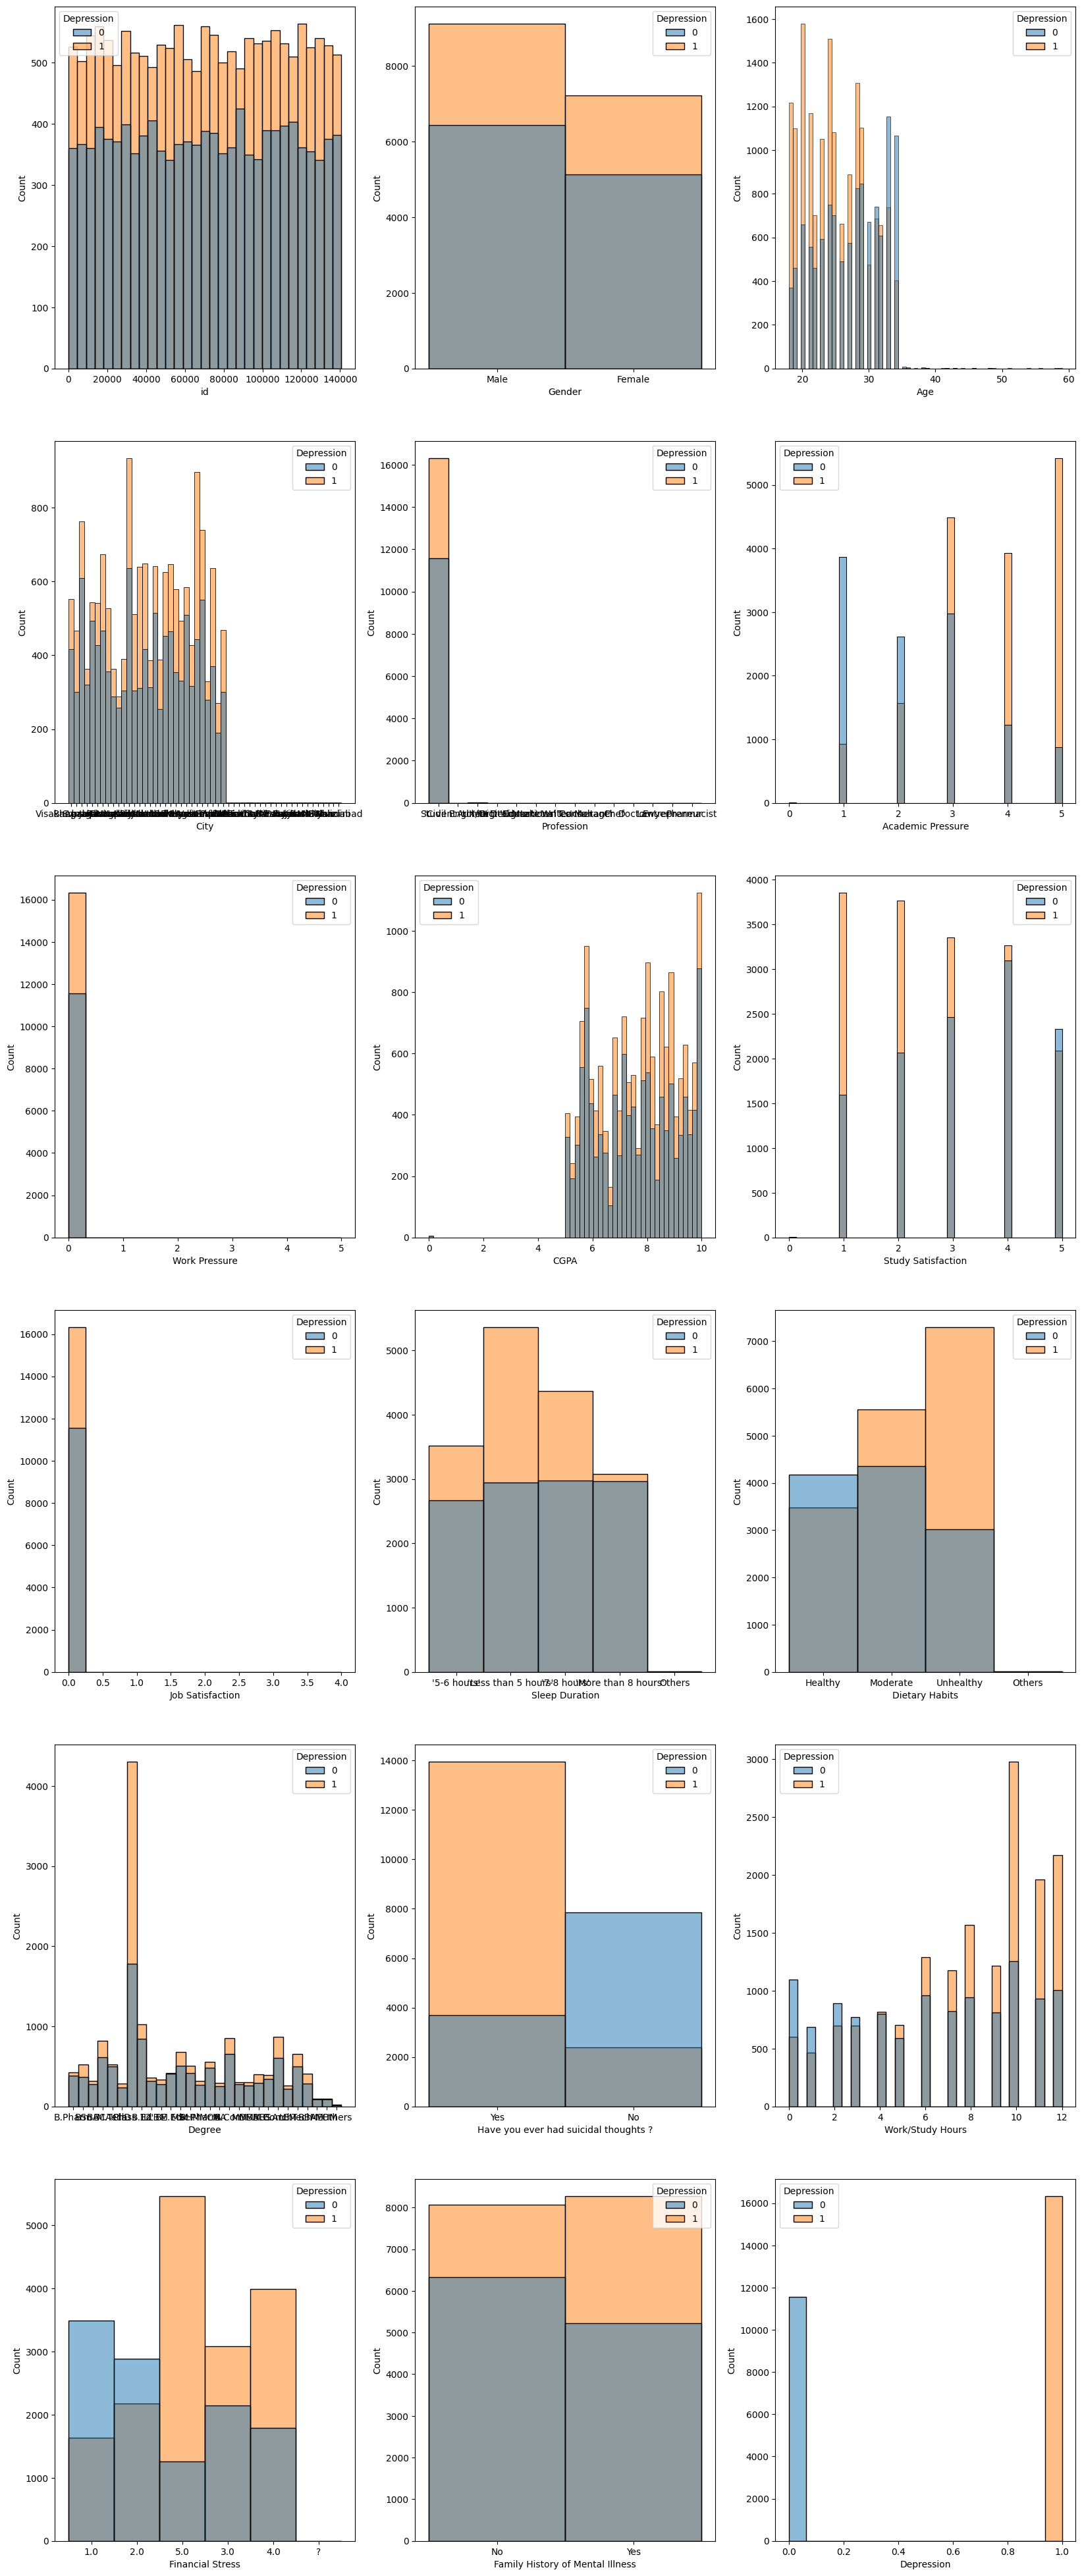

In [ ]:
fig, axes = plt.subplots(6, 3, figsize=(20, 50))
for i, column in enumerate(mental_healt_df.columns):
    row = i//3
    col = i%3
    sns.histplot(mental_healt_df, x=column, hue='Depression', ax=axes[row][col])
    

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [32]:
X = mental_healt_df.drop(columns=['Depression'])
y = mental_healt_df['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

In [ ]:
dt_model = DecisionTreeClassifier()
dt_params = {
    
}